In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#database setup
#we create_engine 
# engine = create_engine("sqlite:///Resources/hawaii.sqlite" , echo = False)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# we reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

# We can view all of the classes that automap found

Base.classes.keys()

#results show measurement, station

['measurement', 'station']

In [7]:
# We can view all of the classes that automap found
#results show measurement, station

In [8]:
# Save references to each table
#measurement
Measurement = Base.classes.measurement
#station
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
#database session object

session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_twelve_months = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Calculate the date 1 year ago from the last data point in the database
#last date id 19550, 2017/ 08/ 23
one_year_ago = dt.datetime.strptime(last_twelve_months, '%Y-%m-%d') - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
d_precipitation = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date >= one_year_ago).\
                order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
d_precipitation_df = pd.DataFrame(d_precipitation, columns =['Date', 'Precipitation'])

# Sort the dataframe by date
d_precipitation_df.set_index('Date', inplace = True)
d_precipitation_df


# Use Pandas Plotting with Matplotlib to plot the data


,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [11]:
#Calculate the average of these values so you have a single prcp value per date.

average = d_precipitation_df.groupby('Date').mean()
average

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


Text(0, 0.5, 'Inches')

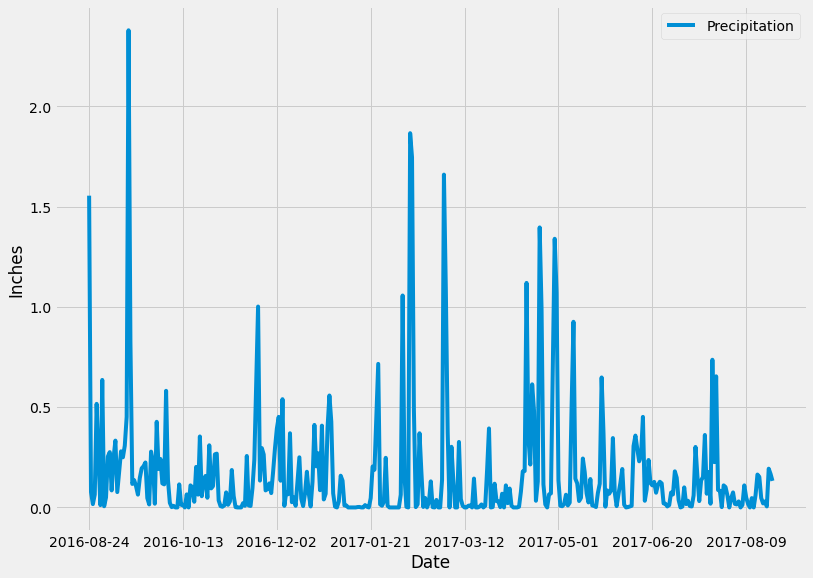

In [12]:
average.plot(kind = "line", figsize = (12,9))
plt.ylabel('Inches')
#add plt.tight_layout()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data:

#precipitation analysis
#d_precipitation_df.mean()
#d_precipitation_df.median()
#d_precipitation_df.std()
#d_precipitation_df.min()
#d_precipitation_df.max()

average.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [14]:
#EXTRA Analysis
#aggregate statistic for reference purposes
average.agg({'Precipitation': ['min','max','count', 'mean', 'median', 'std', 'skew']})

,Precipitation
min,0.000000
max,2.380000
count,365.000000
mean,0.169987
median,0.070000
std,0.295722
skew,3.721606


In [15]:
# Design a query to show how many stations are available in this dataset?

available_station = session.query(Station).count()

#results are: 
available_station

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
datas_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
datas_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
#most active stations are first
most_active_station = datas_station[0][0]
most_active_station


'USC00519281'

In [18]:
#most active stations are second
second_most_active_station = datas_station[1][0]
second_most_active_station


'USC00519397'

In [19]:
#most active stations are third
third_most_active_station = datas_station[2][0]
third_most_active_station


'USC00513117'

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
           
lowest_temperature = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
print(f" Lowest temperature for Most active station was {lowest_temperature} ")


 Lowest temperature for Most active station was [(54.0,)] 


In [21]:
highest_temperature = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

print(f"Highest temperature for Most active station was {highest_temperature} ")

Highest temperature for Most active station was [(85.0,)] 


In [22]:
average_temperature = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
print(f" Average temperature for Most active station was {average_temperature} ")

 Average temperature for Most active station was [(71.66378066378067,)] 


In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_with_hightemp = session.query(Measurement.tobs).\
    filter(Measurement.date > one_year_ago).\
    filter(Measurement.station == most_active_station).all()

#station_with_hightemp_dataframe
station_with_hightemp_df = pd.DataFrame(station_with_hightemp)


Text(0.5, 0, 'Temperature')

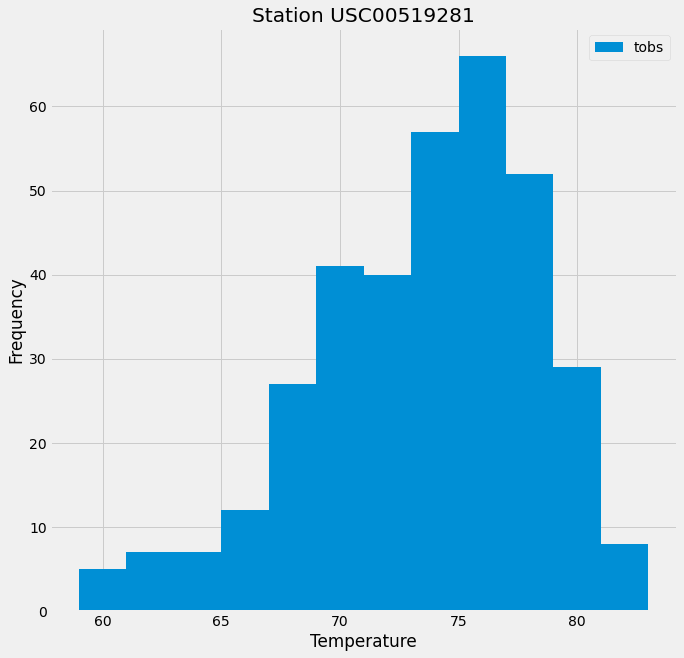

In [24]:
#plotting results as histogram
#bins 
station_with_hightemp_df.plot.hist('tobs', bins=12, figsize =(10,10), title = 'Station USC00519281')

plt.ylabel('Frequency')
plt.xlabel('Temperature')
#add plt.tight_layout()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
